# Single Linear Regression - Ejemplo - Desempeño de Estudiantes

**Contexto**  
Este conjunto de datos contiene el desempeño de estudiantes, de acuerdo diversos factores.

**Contenido**  
El conjunto de datos proviene de kaggle: [Student Performance](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression).  
Contiene 10,000 renglones, con las siguientes columnas:
* Hours Studied: numero total de horas dedicadas al estudio
* Previous Scores: calificaciones obtenidas en pruebas anteriores
* Extracurricular Activities: si se participa en actividades extracurriculares (Yes o No)
* Sleep Hours: número promedio de horas de sueño por día
* Sample Question Papers Practiced: número de exámenes muestra en los que se practicó
* **Performance Index**: medida del desempeño del estudiante (entre 10 y 100) **-> variable objetivo**

**Planteamiento del problema**  
Se busca encontrar que factores tienen mayor influencia en el desempeño de los estudiantes.

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Cargar Datos

In [2]:
# Importar los datos
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
# Renombrar columnas
df.columns = ['horas_estudio', 'calificacion_anterior', 'actividades_extra', 'horas_sueño', 'preguntas_practica', 'desempeño']

## Modelado

In [4]:
# Variable independiente
X = df[['calificacion_anterior']]
X.head()

,calificacion_anterior
0,99
1,82
2,51
3,52
4,75


In [5]:
# Variable dependiente
y = df['desempeño']
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: desempeño, dtype: float64

In [6]:
print('X:', len(X), 'y:', len(y))

X: 10000 y: 10000


In [7]:
# Conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
print('X_train:', len(X_train), 'y_train:', len(y_train))
print('X_test:',  len(X_test),  'y_test:',  len(y_test))

X_train: 7000 y_train: 7000
X_test: 3000 y_test: 3000


In [9]:
# Entrenamiento
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
# Predicciones
prediction = model.predict(X_test)
prediction

array([52.76270943, 45.63832258, 76.17140911, ..., 69.04702225,
       39.53170527, 85.33133507])

In [11]:
# Resultados
print(model.intercept_)
coef = pd.DataFrame(model.coef_, X.columns, columns=['coeficiente'])
coef

-15.42785048387433


,coeficiente
calificacion_anterior,1.01777


## Evaluación

In [12]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 6.584216813668727
MSE: 59.94680316633794
RMSE: 7.742532090107082


<Axes: xlabel='desempeño', ylabel='Density'>

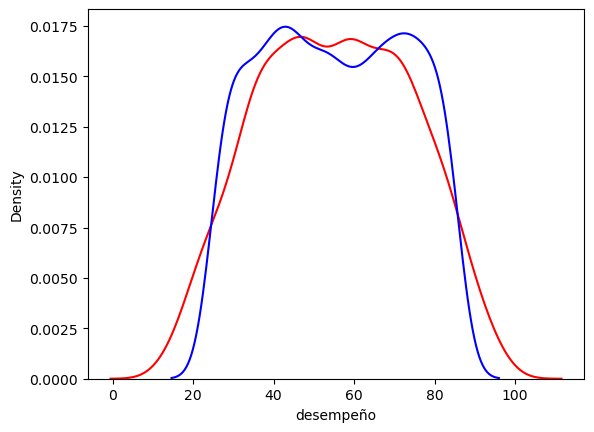

In [13]:
ax1 = sns.kdeplot(y_test, color="r")
sns.kdeplot(prediction, color="b", ax=ax1)

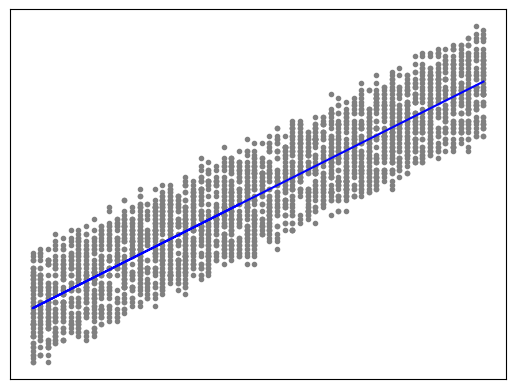

In [14]:
# Visualización de la predicción
plt.scatter(X_test, y_test, color='gray', marker='.')
plt.plot(X_test, prediction, color='blue')
plt.xticks(())
plt.yticks(())
plt.show()